# Import Statements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Mordred 2D

## Reading Datasets

### I will start using only the dataset with mordred 2D descriptors, to get used to the process 

In [2]:
drugs = pd.read_csv("../../../../data/fda_approved_datasets/fda_approved_with_descriptors/fda_approved_mordred_2d.csv", low_memory=False)
print(drugs.shape)
drugs.head()

(1895, 1628)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


## Separating explanatory and response variables

In [3]:
# I will create a dataset with only the features from mordred. This will make it
# easier to do the operations on the features

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
    "ROMol",
]

drugs_features = drugs.drop(labels=flag_columns, axis=1)

In [4]:
print(drugs_features.shape)
drugs_features.head()

(1895, 1613)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [5]:
response_variable = drugs[flag_columns].drop(columns=["ROMol"])
response_variable.head()

,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


In [6]:
explanatory_variables = drugs_features.copy()
explanatory_variables.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


## Dealing With Object Columns

Checking how many non numeric values we have

In [7]:
def display_non_numeric_values(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        unique_values = df[column].unique()
        print(f"Column '{column}': {unique_values}")

In [8]:
display_non_numeric_values(explanatory_variables)

Column 'ATS0se': ['71.73774399999999' '85.57842' '81.521076' ... '1757.1744369999997'
 '1818.5892669999996' '2118.1079359999994']
Column 'ATS1se': ['67.70641199999999' '77.11891200000002' '73.55392' ...
 '1748.4718399999995' '1885.8657279999995' '2191.935700000001']
Column 'ATS2se': ['79.629996' '106.88530400000002' '89.398648' ... '3202.990637999999'
 '3358.9924859999996' '3905.188027999998']
Column 'ATS3se': ['82.78847999999999' '107.060544' '92.108736' ... '4602.793097999997'
 '4979.158906' '5535.171248000001']
Column 'ATS4se': ['53.74771200000001' '65.157696' '50.12928' ... '5046.506318000001'
 '5856.3305820000005' '6540.966391999999']
Column 'ATS5se': ['0.0' '20.155392' '13.436928' ... '5380.079506000003' '6567.587452000001'
 '6589.930172']
Column 'ATS6se': ['0.0' '41.850432' '13.436928' ... '5909.8509760000015' '7184.826744'
 '7241.383944000001']
Column 'ATS7se': ['0.0' '6.718464' '26.873856' ... '6756.076894' '7955.895219999999'
 '8011.2967039999985']
Column 'ATS8se': ['0.0' '20

Column 'MAXssssC': ['max() arg is an empty sequence (MAXssssC)' '-1.208333333333333'
 '-0.4334490740740742' '-0.9664351851851851' '-1.1510416666666665'
 '-0.6469907407407407' '-0.09587962962962959' '0.3003472222222221'
 '0.2818287037037037' '-0.9247685185185182' '-2.1666666666666665'
 '0.19578703703703715' '-1.9722222222222219' '-3.427469135802469'
 '-0.7042824074074072' '0.5046296296296297' '-5.378541666666667'
 '-0.07928240740740722' '-0.48437499999999956' '0.578125'
 '0.6001157407407407' '-2.4450694444444445' '-0.14501039304610752'
 '-0.7384259259259258' '-4.629243827160494' '-4.946442901234567'
 '-1.0615972222222219' '-1.266892479213908' '-4.317901234567901'
 '-1.0529166666666665' '0.2505787037037036' '-5.6345833333333335'
 '-0.6735185185185186' '-3.291666666666666' '-1.385503590325019'
 '-1.0516666666666667' '-1.0945833333333335' '-0.3180697278911566'
 '-0.5186805555555556' '-0.8818518518518519' '-1.0699305555555556'
 '-0.4317361111111113' '-1.1906481481481483' '-1.203958333333333

We can see that a lot of the non numeric are float numbers, stored as strings. Let's convert them to float, and the ones that can't be converted to float, will be converted to pd.NaN

In [9]:
def convert_non_numeric_to_nan(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [10]:
convert_non_numeric_to_nan(explanatory_variables)

In [11]:
display_non_numeric_values(explanatory_variables)

Column 'Lipinski': [ True False]
Column 'GhoseFilter': [False  True]


We still have the columns Lipinki and Ghose Filter, that are boolean. We will drop those columns

In [12]:
bool_cols_to_drop = ["Lipinski", "GhoseFilter"]
explanatory_variables = explanatory_variables.drop(bool_cols_to_drop, axis=1)
display_non_numeric_values(explanatory_variables)

In [13]:
print(explanatory_variables.shape)
explanatory_variables.head()

(1895, 1611)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


## Dealing with Infinity Values

Let's check if the dataset has infinity values.

In [14]:
# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(explanatory_variables))

print(f"Number of Infinity Values (np.inf): {num_infinity.sum()}")

Number of Infinity Values (np.inf): 0


## Scaling of variables

Scaling is necessary so every variable is on the same scale and are comparable to each other. Non-parametric imputation as kNN are very sensible to the scale of the variables, so this is mandatory step.

In [15]:
# scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(explanatory_variables)

# Merging the column name with the scale data array
explanatory_variables_scaled = pd.DataFrame(scaled_data, columns=explanatory_variables.columns)
print(explanatory_variables_scaled.shape)
explanatory_variables_scaled.head()

(1895, 1611)


/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.859841,-2.127739,-0.413307,2.729961,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.828642,-0.657103,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830
1,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.736728,-0.112096,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
2,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.731005,0.434065,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
3,-1.893836,-2.144395,-0.413307,0.445954,-1.846731,-5.790809,-5.979210,-1.846731,-2.201681,-4.349566,...,-6.639064,-2.558838,-1.725239,-0.401573,-0.413438,-1.712307,-1.893429,-1.863888,-1.498028,-1.720279
4,-1.859841,-2.127739,-0.413307,-0.696050,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.719581,0.060375,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830


## Zero Variance Filter

Below is a function that removes variance using a threshold. Because the data is scaled, the variance present is only either 1 or 0. Therefore, this function will only remove features with variance equals to zero.

In [16]:
def variance_threshold_selector(data, threshold=0.0):
    """
    Recieves a SCALED dataframe and returns the non-zero variance dataframe
    data: scaled dataframe
    threshold: minimum variance
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [17]:
# Zero variance filter over scaled data
explanatory_variables_no_low_var = variance_threshold_selector(explanatory_variables_scaled)
print(explanatory_variables_no_low_var.shape)
explanatory_variables_no_low_var.head()

(1895, 1396)


/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:120: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.859841,-2.127739,-0.413307,2.729961,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.828642,-0.657103,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830
1,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.736728,-0.112096,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
2,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.731005,0.434065,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
3,-1.893836,-2.144395,-0.413307,0.445954,-1.846731,-5.790809,-5.979210,-1.846731,-2.201681,-4.349566,...,-6.639064,-2.558838,-1.725239,-0.401573,-0.413438,-1.712307,-1.893429,-1.863888,-1.498028,-1.720279
4,-1.859841,-2.127739,-0.413307,-0.696050,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.719581,0.060375,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830


## Filling NaN Values

We can see here that we have 1895 molecules with NaN Values.

There are 1895 rows with at least one NaN value.


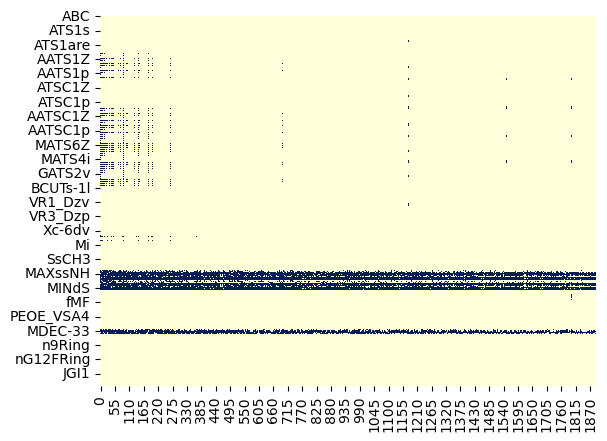

In [18]:
explanatory_variables_no_low_var[explanatory_variables_no_low_var.isnull().any(axis=1)]
print(f'There are {explanatory_variables_no_low_var[explanatory_variables_no_low_var.isnull().any(axis=1)].shape[0]} rows with at least one NaN value.')
g = sns.heatmap(explanatory_variables_no_low_var.isna().transpose(), cmap="YlGnBu", cbar=False)

## Dropping All Columns That Are Mainly NaN

We can see from the heatmap that some columns are mostly filled by nan values. These columns are useless to us, and should be deleted. We will drop all columns that are 50% filled by NaN values.

In [19]:
def drop_columns_with_high_nan_count(df: pd.DataFrame, fraction: float):
    threshold = df.shape[0] * fraction
    columns = []
    for column in df.columns:
        if df[column].isna().sum() >= threshold:
            columns.append(column)
    return df.drop(columns, axis=1)

In [20]:
explanatory_variables_low_nan_columns = drop_columns_with_high_nan_count(df=explanatory_variables_no_low_var, fraction=0.5)
print(explanatory_variables_low_nan_columns.shape)
explanatory_variables_low_nan_columns.head()

(1895, 1324)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.859841,-2.127739,-0.413307,2.729961,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.828642,-0.657103,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830
1,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.736728,-0.112096,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
2,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.731005,0.434065,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
3,-1.893836,-2.144395,-0.413307,0.445954,-1.846731,-5.790809,-5.979210,-1.846731,-2.201681,-4.349566,...,-6.639064,-2.558838,-1.725239,-0.401573,-0.413438,-1.712307,-1.893429,-1.863888,-1.498028,-1.720279
4,-1.859841,-2.127739,-0.413307,-0.696050,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.719581,0.060375,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830


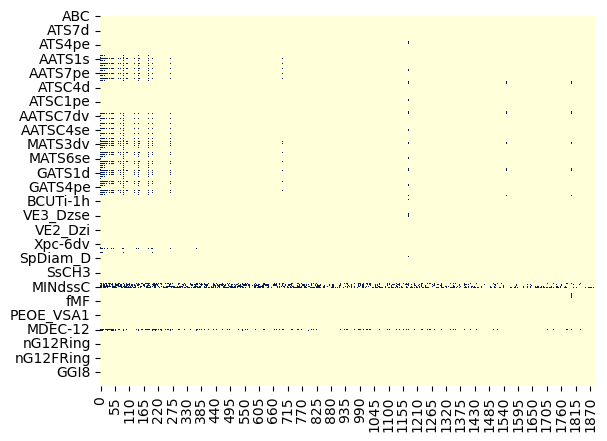

In [21]:
g = sns.heatmap(explanatory_variables_low_nan_columns.isna().transpose(), cmap="YlGnBu", cbar=False)

## KNN

Using the KNN method to fill the NaN values.

Using the K-nearest neighbors (KNN) method to replace NaN values in a dataset can be effective under certain conditions. Here are some scenarios in which using the KNN method for imputation can be appropriate:

1. **Continuous Numerical Data**: KNN imputation works well for continuous numerical data. It's particularly useful when the missing values are not easily predictable based on the other available features.

2. **Structural Relationships**: KNN imputation is suitable when there is a reasonable assumption that similar instances (data points) have similar values. If your data has a clear underlying structure, KNN can be beneficial.

3. **Small to Medium-sized Datasets**: KNN imputation can be computationally expensive, especially for large datasets. It's generally more suitable for small to medium-sized datasets where the computational cost is manageable.

4. **Multivariate Relationships**: If the missing values have complex relationships with multiple other features, KNN can capture these relationships better than simple imputation methods.

5. **No Assumption of Linearity**: KNN is a non-parametric method, meaning it doesn't make strong assumptions about the underlying distribution or relationships in the data. This can be advantageous when you're uncertain about the data's characteristics.

6. **Robust to Outliers**: KNN can handle outliers and skewed distributions relatively well because it relies on distances between data points rather than direct calculations involving the values.

However, there are also situations where KNN imputation might not be the best choice:

1. **High-Dimensional Data**: KNN suffers from the "curse of dimensionality," where the effectiveness of distance-based methods like KNN decreases as the number of dimensions increases. In high-dimensional spaces, distances between points become less meaningful.

2. **Sparse Data**: If your dataset has a high percentage of missing values, KNN imputation might struggle to find meaningful neighbors, and the imputed values may be unreliable.

3. **Computationally Intensive**: As mentioned earlier, KNN imputation can be computationally expensive, especially for larger datasets. For large datasets, alternative methods might be more efficient.

4. **Categorical Data**: KNN is originally designed for numerical data. While there are adaptations for categorical data (e.g., k-prototypes), KNN imputation might not be the most straightforward choice for handling missing values in categorical features.

5. **Imbalanced Datasets**: KNN might favor imputations from the majority class in imbalanced datasets.

Before using KNN imputation, it's a good practice to explore your data, understand the underlying relationships, and consider the characteristics of your dataset. It's often a good idea to compare KNN imputation with other imputation methods (such as mean, median, or more advanced techniques) to see which one performs best for your specific dataset and analysis goals.

Source: ChatGPT

It's important to note that, even though KNN seems very good for this situation, High Dimensionality is a problem here.

In [22]:
print(f"Number of Nan values: {explanatory_variables_low_nan_columns.isna().sum().sum()}")

Number of Nan values: 18931


In [23]:
selector = KNNImputer(n_neighbors=5)
explanatory_variables_fill_na = selector.fit_transform(explanatory_variables_low_nan_columns)

In [24]:
explanatory_variables_no_na = pd.DataFrame(explanatory_variables_fill_na, columns=explanatory_variables_low_nan_columns.columns)
print(explanatory_variables_no_na.shape)
explanatory_variables_no_na.head()

(1895, 1324)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.859841,-2.127739,-0.413307,2.729961,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.828642,-0.657103,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830
1,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.736728,-0.112096,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
2,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.731005,0.434065,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
3,-1.893836,-2.144395,-0.413307,0.445954,-1.846731,-5.790809,-5.979210,-1.846731,-2.201681,-4.349566,...,-6.639064,-2.558838,-1.725239,-0.401573,-0.413438,-1.712307,-1.893429,-1.863888,-1.498028,-1.720279
4,-1.859841,-2.127739,-0.413307,-0.696050,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.719581,0.060375,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830


Number of Nan values: 0


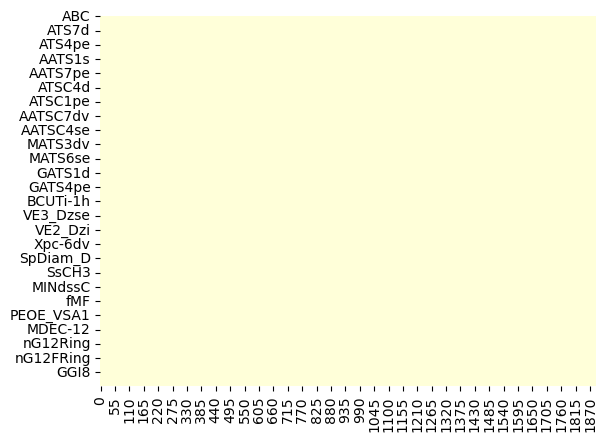

In [25]:
print(f"Number of Nan values: {explanatory_variables_no_na.isna().sum().sum()}")
g = sns.heatmap(explanatory_variables_no_na.isna().transpose(), cmap="YlGnBu", cbar=False)

## Descale Data

Now, we need to restore the data to the way it way before scaling. We do this fo rtwo reasons:

1. Some models need to be calculated on scaled data, some can't be.

2. For the models that need to use scaled data, the scaling process needs to be done separatly for the training and the testing datasets.

For descaling, it's essential to utilize the identical scaler object employed for the initial data scaling. However, the scaler object was originally fitted to the complete dataset, and along the notebook, several columns from that dataset were removed. We'll craft a provisional dataset that retains the original data but only has the selected columns. This new dataset will be scaled using a new scaler object, enabling us to accurately descale the data.


In [26]:
# creating temporary dataset
drugs_scaler = explanatory_variables[explanatory_variables_no_na.columns].copy()
drugs_scaler.shape

(1895, 1324)

In [27]:
# fitting the scaler object to the temporary dataset
descaler = StandardScaler()
_ = descaler.fit_transform(drugs_scaler)

In [28]:
# descaling
explanatory_variables_descaled = descaler.inverse_transform(explanatory_variables_no_na)
explanatory_variables_descaled = pd.DataFrame(explanatory_variables_descaled, columns=explanatory_variables_no_na.columns)

print(explanatory_variables_descaled.shape)
explanatory_variables_descaled.head()

(1895, 1324)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0.0,3.0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9.0,0.0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0.0,0.0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18.0,2.0,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0.0,0.0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18.0,2.0,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0.0,1.0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10.0,1.0,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0.0,0.0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9.0,0.0,12.0,9.0,3.111111,1.000000


Here we can compare a few columns of the dataset before the feature selection, and after descaling

In [29]:
explanatory_variables_descaled[["ABC", "nAcid", "SpMAD_A", "TSRW10"]]

,ABC,nAcid,SpMAD_A,TSRW10
0,2.449490,0.0,0.866025,24.179697
1,3.047207,0.0,1.045250,27.254130
2,3.047207,0.0,1.045250,27.254130
3,2.121320,0.0,1.118034,22.328143
4,2.449490,0.0,0.866025,24.179697
...,...,...,...,...
1890,73.222407,0.0,1.239871,153.940560
1891,79.462056,1.0,1.256969,143.164993
1892,79.746720,5.0,1.161504,148.078821
1893,93.841149,3.0,1.253993,163.798831


In [30]:
drugs[["ABC", "nAcid", "SpMAD_A", "TSRW10"]]

,ABC,nAcid,SpMAD_A,TSRW10
0,2.449490,0,0.866025,24.179697
1,3.047207,0,1.045250,27.254130
2,3.047207,0,1.045250,27.254130
3,2.121320,0,1.118034,22.328143
4,2.449490,0,0.866025,24.179697
...,...,...,...,...
1890,73.222407,0,1.239871,153.940560
1891,79.462056,1,1.256969,143.164993
1892,79.746720,5,1.161504,148.078821
1893,93.841149,3,1.253993,163.798831


## Remove Highly Correlated Features

It is very important to remove feature with high correlation

In [31]:
def remove_high_corr(df, corr_threshold):
  '''DataFrame, float --> DataFrame

  -----------------------------------------------------------------------------

  This fuction recieved a df and a threshold value for correlation. It will than,
  for each pair or features with correlation above the threshold, select only one.
  It will than return the df without those variables.'''

  #Correlation matrix
  corr_matrix = df.corr().abs()

  #Selecting upper triangle from correlation matrix
  corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

  #Selecting variables to be removed
  remove = []

  for col in corr_matrix.columns:
    if any(corr_matrix[col] > corr_threshold):
      remove.append(col)  
  
  print(f'Number of features removed: {len(remove)}')

  return df.drop(remove, axis = 1)

In [32]:
molecules_features_no_high_corr = remove_high_corr(explanatory_variables_descaled, 0.9)
print(molecules_features_no_high_corr.shape)
molecules_features_no_high_corr.head()

Number of features removed: 757
(1895, 567)


,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,VR3_A,nAromAtom,nSpiro,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10,TopoShapeIndex,SRW05
0,2.449490,0.0,3.0,1.732051,0.866025,1.931852,5.583629,0.803548,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.0
1,3.047207,0.0,0.0,1.847759,1.045250,2.130986,8.629874,1.462083,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486111,0.5,0.0
2,3.047207,0.0,0.0,1.847759,1.045250,2.130986,8.629874,1.462083,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486111,0.5,0.0
3,2.121320,0.0,1.0,1.618034,1.118034,1.946498,5.891993,0.857304,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277778,0.5,0.0
4,2.449490,0.0,0.0,1.732051,0.866025,1.931852,5.583629,0.803548,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.0


## Re-join response and explanatory variables

In [33]:
drugs_processed = pd.concat([response_variable, molecules_features_no_high_corr], axis=1)

In [34]:
print(drugs_processed.shape)
drugs_processed.head()

(1895, 581)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10,TopoShapeIndex,SRW05
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.0
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486111,0.5,0.0
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486111,0.5,0.0
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277778,0.5,0.0
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.0


## Save Dataset

In [35]:
drugs_processed.to_csv("../data/fda_mordred_pre_processed_descriptors_2d.csv", index=False)